In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("data/Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [36]:
df.duplicated().sum()

1889

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
for i in df.columns:
    print(i,' ',df[i].unique())

Education   ['Bachelors' 'Masters' 'PHD']
JoiningYear   [2017 2013 2014 2016 2015 2012 2018]
City   ['Bangalore' 'Pune' 'New Delhi']
PaymentTier   [3 1 2]
Age   [34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]
Gender   ['Male' 'Female']
EverBenched   ['No' 'Yes']
ExperienceInCurrentDomain   [0 3 2 5 1 4 7 6]
LeaveOrNot   [0 1]


In [39]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [40]:
for i in df.columns:
    print(df[i].value_counts())

Education
Bachelors    1971
Masters       637
PHD           156
Name: count, dtype: int64
JoiningYear
2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: count, dtype: int64
City
Bangalore    1171
Pune          801
New Delhi     792
Name: count, dtype: int64
PaymentTier
3    1976
2     570
1     218
Name: count, dtype: int64
Age
28    365
27    218
30    186
29    180
26    179
25    167
24    161
36    121
40    119
37    119
34    118
38    117
39    115
31    115
33    114
32    113
35    110
41     75
23     41
22     31
Name: count, dtype: int64
Gender
Male      1529
Female    1235
Name: count, dtype: int64
EverBenched
No     2403
Yes     361
Name: count, dtype: int64
ExperienceInCurrentDomain
2    681
5    470
3    451
1    433
4    425
0    287
7      9
6      8
Name: count, dtype: int64
LeaveOrNot
0    1676
1    1088
Name: count, dtype: int64


SOME ANALYTICS

Text(0.5, 1.0, 'Education Diversity')

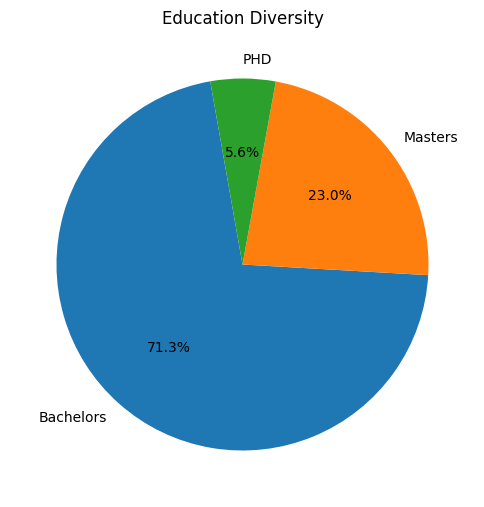

In [41]:
edu_counts = df["Education"].value_counts()
plt.figure(figsize=(6,8))
plt.pie(edu_counts,labels=edu_counts.index,autopct="%1.1f%%",startangle=100)
plt.title("Education Diversity")

Text(0.5, 1.0, 'No of people joined in each year')

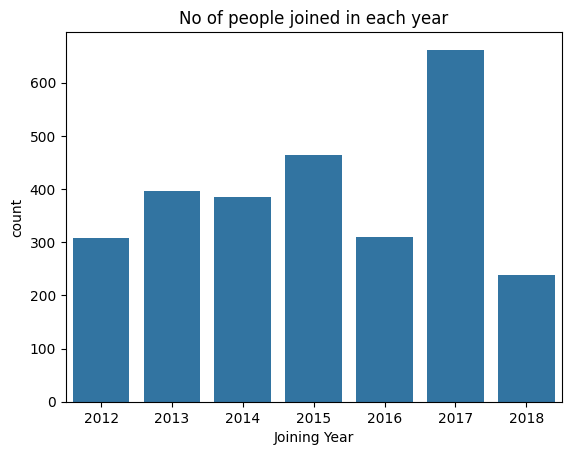

In [42]:
sns.countplot(data=df,x="JoiningYear")
plt.xlabel("Joining Year")
plt.title("No of people joined in each year")

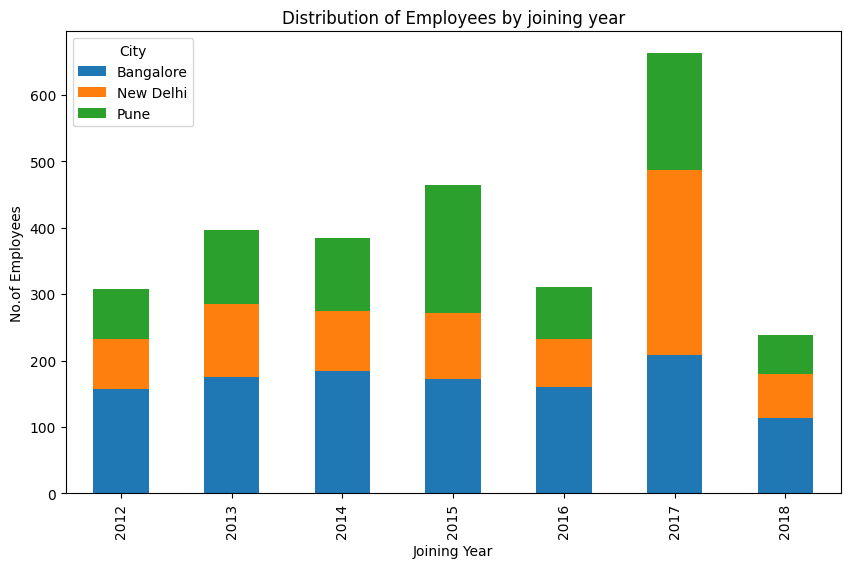

In [43]:
city_joinyear = df.groupby(['JoiningYear',"City"]).size().unstack()
ax= city_joinyear.plot(kind='bar',stacked=True,figsize=(10,6))

plt.xlabel("Joining Year")
plt.ylabel("No.of Employees")
plt.title("Distribution of Employees by joining year")
plt.legend(title = "City",loc="upper left")
plt.show()

<Axes: xlabel='Education', ylabel='count'>

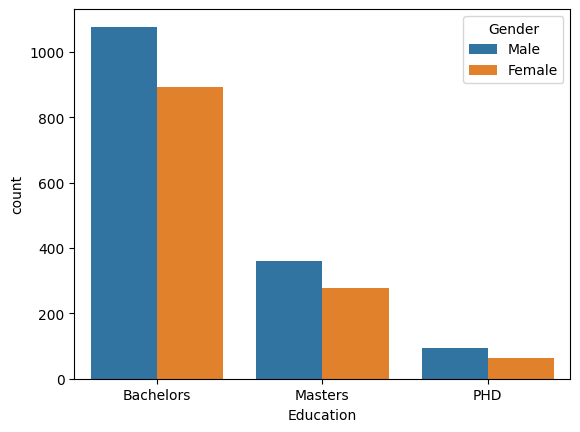

In [44]:
sns.countplot(data=df,x=df.Education,hue = "Gender")

<Axes: xlabel='EverBenched', ylabel='count'>

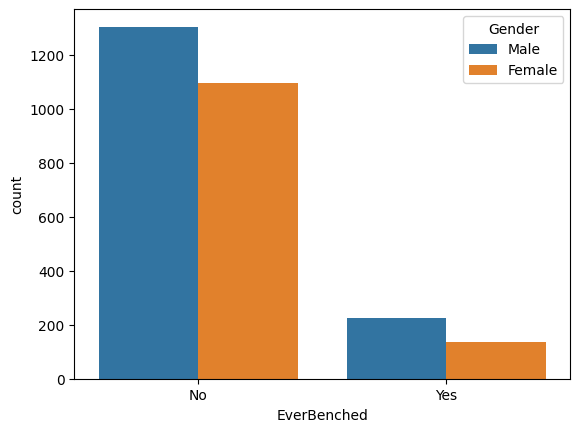

In [45]:
sns.countplot(data=df,x=df.EverBenched,hue="Gender")

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

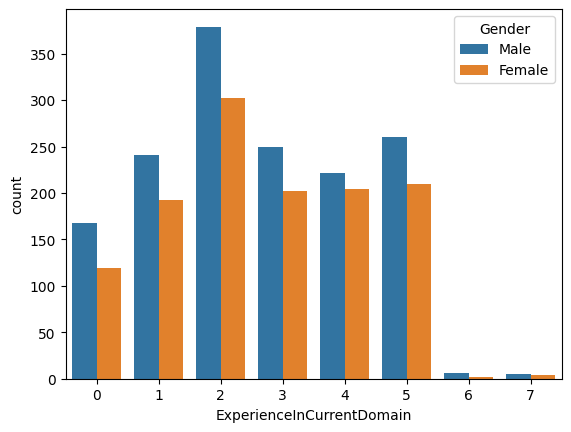

In [46]:
sns.countplot(data=df,x=df["ExperienceInCurrentDomain"],hue="Gender")

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
category_col = [i for i in df.columns if df[i].dtype=="object"]
category_col

['Education', 'City', 'Gender', 'EverBenched']

In [49]:
for i in category_col:
    df[i]=le.fit_transform(df[i])
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [50]:
df.corr()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Education,1.000000,0.113858,0.111153,-0.071380,-0.107324,0.025057,-0.084810,0.043842,0.019661
JoiningYear,0.113858,1.000000,0.038988,-0.053823,0.024445,0.007990,0.042903,-0.031228,0.150650
City,0.111153,0.038988,1.000000,-0.209064,-0.071884,-0.098009,-0.036916,0.002805,0.127548
PaymentTier,-0.071380,-0.053823,-0.209064,1.000000,0.067514,0.172051,0.057464,-0.004602,-0.119891
Age,-0.107324,0.024445,-0.071884,0.067514,1.000000,0.037884,-0.078617,-0.053276,-0.114943
Gender,0.025057,0.007990,-0.098009,0.172051,0.037884,1.000000,0.052479,-0.019080,-0.190457
EverBenched,-0.084810,0.042903,-0.036916,0.057464,-0.078617,0.052479,1.000000,0.002259,0.037137
ExperienceInCurrentDomain,0.043842,-0.031228,0.002805,-0.004602,-0.053276,-0.019080,0.002259,1.000000,-0.021181
LeaveOrNot,0.019661,0.150650,0.127548,-0.119891,-0.114943,-0.190457,0.037137,-0.021181,1.000000


<Axes: >

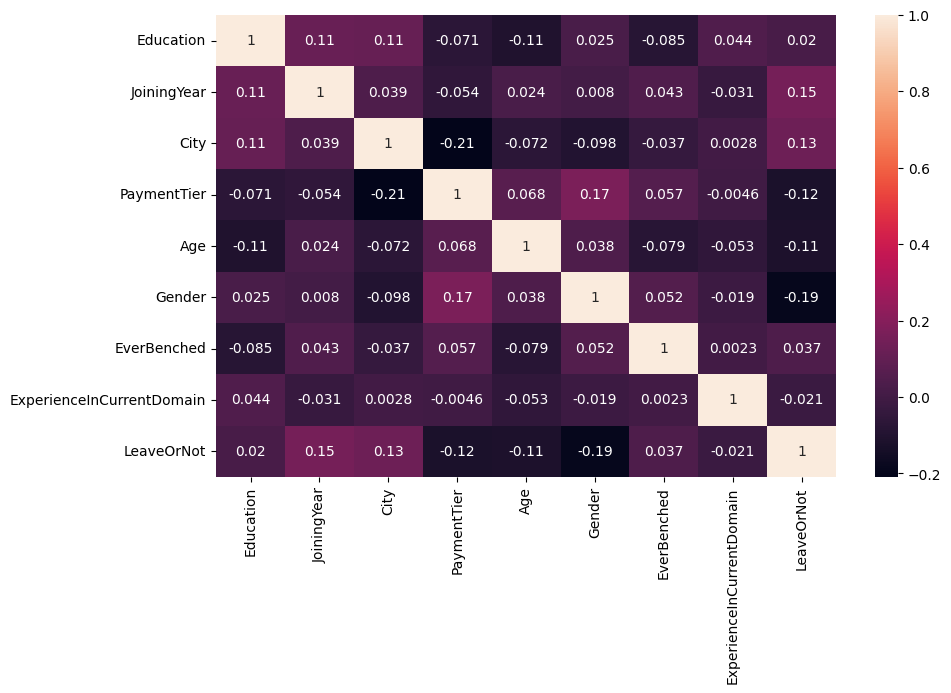

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [52]:
import scipy.stats as stats

z_score = stats.zscore(df)

df.size

24876

In [53]:
df = df[(z_score<=3).all(axis=1)]
df.size
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4645,1,2017,2,2,31,0,0,2,0
4647,0,2016,2,3,30,1,0,2,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [55]:
X= df.drop(columns=["LeaveOrNot"])
y=df["LeaveOrNot"]

In [56]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [57]:
models = [
    ("DecisionTreeClassifier",DecisionTreeClassifier()),
    ("RandomForestClassifier",RandomForestClassifier()),
    ("KNeighborsClassifier",KNeighborsClassifier()),
    ("GaussianNB",GaussianNB())
]

DecisionTreeClassifier 

Accuracy score:  0.6903039073806078


Precision score:  0.622568093385214


recall score:  0.5776173285198556


f1 score:  0.599250936329588




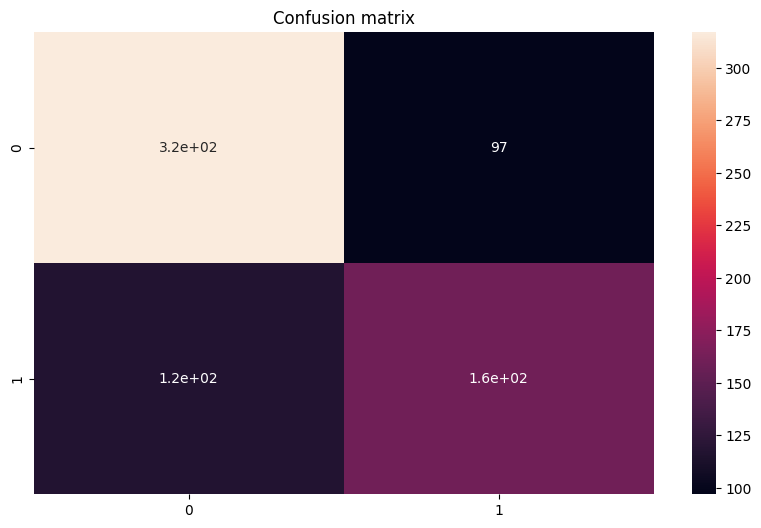

RandomForestClassifier 

Accuracy score:  0.7250361794500724


Precision score:  0.6851063829787234


recall score:  0.5812274368231047


f1 score:  0.62890625




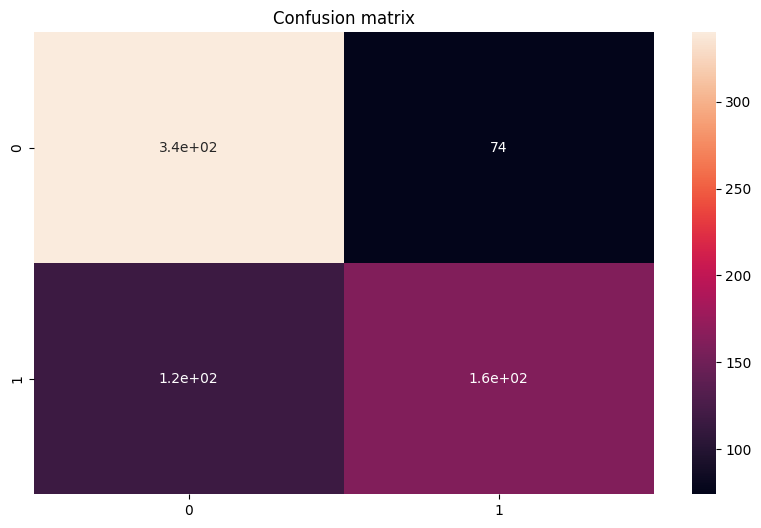

KNeighborsClassifier 

Accuracy score:  0.6685962373371924


Precision score:  0.6061946902654868


recall score:  0.49458483754512633


f1 score:  0.5447316103379721




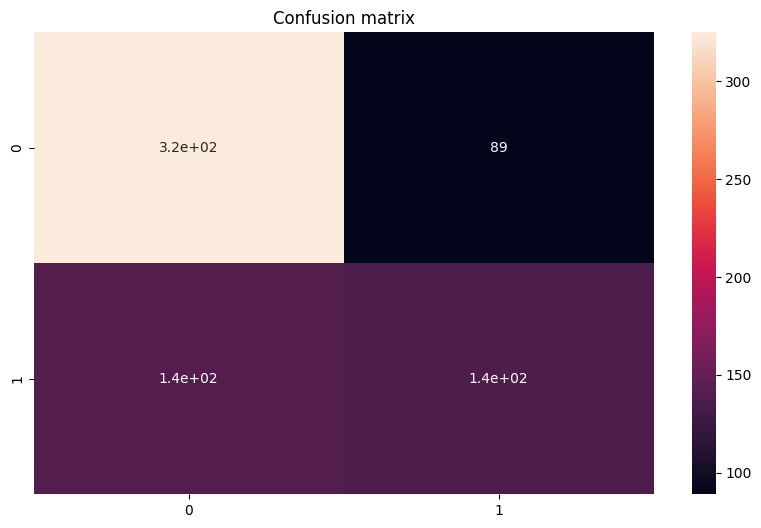

GaussianNB 

Accuracy score:  0.6642547033285094


Precision score:  0.6130653266331658


recall score:  0.4404332129963899


f1 score:  0.5126050420168067




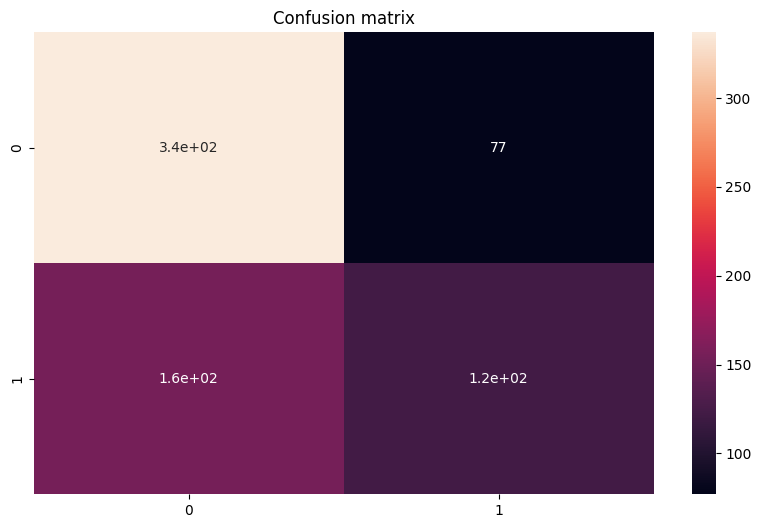

In [58]:
for name, model in models:
    print(name,"\n")
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Accuracy score: ",accuracy_score(y_test,y_pred))
    print("\n")
    print("Precision score: ",precision_score(y_test,y_pred))
    print("\n")
    print("recall score: ",recall_score(y_test,y_pred))
    print("\n")
    print("f1 score: ",f1_score(y_test,y_pred))
    print("\n")
    confusion_mat = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(10,6))
    sns.heatmap(confusion_mat,annot=True)
    plt.title("Confusion matrix")
    plt.show()